# **02. Feature Engineering**
*This notebook will focus on adding extra features like saleYear, saleMonth, etc., derived from the saledate column.*


## Objectives

- Engineer features for modeling bulldozer prices
- To improve our bulldozer price predictions by:
    - Creating helpful new data points
    - Adjusting existing information
    - Picking the most useful details that help predict prices accurately
- To look at our data closely to understand how different pieces of information are connected and organized, which will help us find what's most important for predicting bulldozer prices

## Inputs

- Raw bulldozer sales dataset containing sale dates, machine hours, model identifiers, and other relevant attributes
- Extra data to make our analysis better
- A processed dataset with engineered features, ready for model training
- Visualizations and summary statistics showing data insights and feature engineering effectiveness

## Outputs

- Dataset prepared and improved for predicting bulldozer prices
- Analysis of which features affect bulldozer prices the most

## Additional Comments

- Clean up any data that's missing or unusual before using it
- Document all decisions and their rationales during the data improvement process
- This notebook is a crucial step in our machine learning pipeline, preparing data for accurate and robust predictive models
- **Traditional data analysis techniques include:**
    - **Exploratory Data Analysis (EDA)**: Understanding distributions, relationships, and patterns through summary statistics, visualizations, and outlier identification
    - **Correlation Analysis**: Identifying relevant features by analyzing their relationships with bulldozer prices
    - **Data Cleaning**: Handling missing values, fixing inconsistencies, and formatting data appropriately
- **Machine learning techniques include:**
    - **Feature Engineering**: Creating new features like bulldozer age and usage metrics, and converting categorical variables to numerical forms
    - **Feature Selection**: Using preliminary models to evaluate and select the most important features
    - **Data Transformation**: Applying scaling and normalization to prepare features for model training

By combining these approaches, we've created a thorough process for preparing our dataset for accurate price prediction models.

---

# Execution Timestamp

Purpose: This code block adds a timestamp to track notebook execution
- Helps monitor when analysis was last performed
- Ensures reproducibility of results
- Useful for debugging and version control

In [111]:
# Timestamp
import datetime

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2025-02-15 13:08:22.714589


# Project Directory Structure and Working Directory

**Purpose: This code block establishes and explains the project organization**
- Creates a standardized project structure for data science workflows
- Documents the purpose of each directory for team collaboration
- Gets current working directory for file path management

## Key Components:
1. `data/ directory` stores all datasets (raw, processed, interim)
2. `src/` contains all source code (data preparation, models, utilities)
3. `notebooks/` holds Jupyter notebooks for experimentation
4. `results/` stores output files and visualizations

## Project Root Structure

- **`data/`** - Where all your datasets live
    - `raw/` - Original, untouched data
    - `processed/` - Cleaned and prepared data
    - `interim/` - Temporary data files
- **`src/`** - Your source code
    - `data_prep/` - Code for preparing data
    - `models/` - Your ML models
    - `utils/` - Helper functions
- **`notebooks/`** - Jupyter notebooks for experiments
- **`results/`** - Model outputs and visualizations

## Setting Up Working Directory
This code block sets up the working environment by:
- Changing to the project directory where our code and data files are located
- Verifying the current working directory to ensure we're in the right place

In [1]:
import os

# Move to the desired directory
os.chdir('c:\\Users\\blign\\Dropbox\\1 PROJECT\\VS Code Project Respository\\About-BulldozerPriceGenius-_BPG-_v2')

# Get the current directory to verify the change
current_dir = os.getcwd()
current_dir

'c:\\Users\\blign\\Dropbox\\1 PROJECT\\VS Code Project Respository\\About-BulldozerPriceGenius-_BPG-_v2'

## Set Working Directory to Project Root
**Purpose: Changes the current working directory to the parent directory**
- Gets the folder one level above the current one
- Makes sure all file locations work correctly throughout the project
- Keeps files and folders organized in a clean way

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


## Get Current Working Directory
**Purpose: Retrieves and stores the current working directory path**
- Gets the folder location where we're currently working
- Saves this location in a variable called current_dir so we can use it later
- Helps us find and work with files in the right place

In [3]:
import os

# Change the current working directory
os.chdir('c:\\Users\\blign\\Dropbox\\1 PROJECT\\VS Code Project Respository')

# Get the current working directory
current_dir = os.getcwd()
current_dir

'c:\\Users\\blign\\Dropbox\\1 PROJECT\\VS Code Project Respository'

# **Import Essential Data Science Libraries and Check Versions**

**Purpose: This code block imports fundamental Python libraries for data analysis and visualization**
- `pandas:` For data manipulation and analysis
- `numpy:` For numerical computations
- `matplotlib:` For creating visualizations and plots

**The version checks help ensure:**
- *Code compatibility across different environments*
- *Reproducibility of analysis*
- *Easy debugging of version-specific issues*


In [115]:
# Import data analysis tools
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


print(f"pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")

pandas version: 2.2.3
NumPy version: 2.2.2
matplotlib version: 3.10.0


# **Adding extra features to our DataFrame**
### What is Feature Engineering?

Feature engineering is a powerful technique that allows us to enhance our dataset by deriving new meaningful information from existing data. In this section, we'll explore how to extract valuable temporal features from our sale dates to improve our analysis.

### Time-Based Components

Our approach will focus on breaking down sale dates into multiple time-based components:

- What year it was sold
- What month it was sold
- What day it was sold
- What day of the week it was sold (like Monday = 1, Tuesday = 2)
- What day of the year it was sold (like January 1st = 1, January 2nd = 2)

### Data Safety

To ensure data integrity throughout this process, we'll first create a backup of our original dataset. This precautionary step will allow us to revert any changes if needed.


## **Creating a Safe Working Copy**
Before we start modifying our dataset, it's crucial to create a backup copy. This ensures we can always return to our original data if needed.

In [116]:
import os

# Check the current directory
current_directory = os.getcwd()
print(f"Current Directory: {current_directory}")

# List all directories in the project
project_directory = current_directory  # Change this if your project directory is different
directories = [d for d in os.listdir(project_directory) if os.path.isdir(os.path.join(project_directory, d))]

print("Directories in the project:")
for directory in directories:
    print(directory)

Current Directory: c:\Users\blign\Dropbox\1 PROJECT\VS Code Project Respository
Directories in the project:
About-BulldozerPriceGenius-_BPG-_v2
BulldozerPriceGenuis-BPG-
churnometer
CI-Malaria-Detection
Culture-Project
data
housing-price-data-ml
inputs
job_board_django_ztm
NederLearn
NederLearn_V2
Nederlearn_V3
Nederlearn_V4
NederLearn_V5
PriceBulldozerAI
Recipe-App
Recipe-App-Tutorial
Recipe-Tutorial-Dee-MC
Scartch-Pad
ZTM-Django-bitly-forms
ztm_bd
ztm_django_bitly_clone_project
ztm_django_jobs_board
ztm_django_movie_app


## File Path Verification Code

This code block serves two essential purposes:

- Verifies the existence of our training dataset (`TrainAndValid.csv`) before attempting to use it
- Provides immediate feedback about file accessibility, helping prevent data loading errors

In [117]:
import os

file_path = "C:\\Users\\blign\\Dropbox\\1 PROJECT\\VS Code Project Respository\\About-BulldozerPriceGenius-_BPG-_v2\\data\\raw\\bluebook-for-bulldozers\\TrainAndValid.csv"

# Check if file exists in specified path
if os.path.exists(file_path):
    print(f"The file {file_path} exists.")
else:
    print(f"The file {file_path} does not exist.")

The file C:\Users\blign\Dropbox\1 PROJECT\VS Code Project Respository\About-BulldozerPriceGenius-_BPG-_v2\data\raw\bluebook-for-bulldozers\TrainAndValid.csv exists.


## Folder Path Verification

This code block is designed to verify the existence of our processed data folder, which is crucial for data management and integrity. It performs two key functions:

- Checks if the specified folder path exists in our project structure
- Provides immediate feedback about folder accessibility to prevent data storage/retrieval errors

In [118]:
import os

folder_path = "C:\\Users\\blign\\Dropbox\\1 PROJECT\\VS Code Project Respository\\About-BulldozerPriceGenius-_BPG-_v2\\data\\processed"

# Check if folder exists in specified path
if os.path.exists(folder_path):
    print(f"The folder {folder_path} exists.")
else:
    print(f"The folder {folder_path} does not exist.")

The folder C:\Users\blign\Dropbox\1 PROJECT\VS Code Project Respository\About-BulldozerPriceGenius-_BPG-_v2\data\processed exists.


## Loading and Preprocessing the Bulldozer Dataset

This code block performs essential data loading and preprocessing steps:

- Reads the raw bulldozer price dataset using pandas, with specific configurations:
    - Disables low memory mode to handle mixed data types
    - Automatically parses the 'saledate' column as datetime
- Creates a safe working copy of the data to prevent modifications to the original dataset
- Saves the preprocessed dataset to our processed data folder for further analysis

In [119]:
import os

# Ensure the file path is correct and the file exists at the specified location
df = pd.read_csv(filepath_or_buffer="../data/raw/bluebook-for-bulldozers/TrainAndValid.csv",
                 low_memory=False, # set low_memory=False to prevent mixed data types warning 
                 parse_dates=["saledate"]) # can use the parse_dates parameter and specify which column to treat as a date column

# With parse_dates... check dtype of "saledate"
df.info()
# Make a copy of the original DataFrame to perform edits on
df_tmp = df.copy()

# Save the copy to the processed folder
processed_file_path = "C:\\Users\\blign\\Dropbox\\1 PROJECT\\VS Code Project Respository\\About-BulldozerPriceGenius-_BPG-_v2\\data\\processed\\TrainAndValid_processed.csv"
df_tmp.to_csv(processed_file_path, index=False)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

## File Existence Verification

This code block performs a crucial check to ensure data availability and prevent potential errors:

- Imports the 'os' module for file system operations
- Defines the exact path to our processed dataset using a raw string (r"...")
- Uses os.path.exists() to verify if the file is present at the specified location
- Provides clear feedback about whether the file was found or not

In [120]:
import os

file_path = r"C:\Users\blign\Dropbox\1 PROJECT\VS Code Project Respository\About-BulldozerPriceGenius-_BPG-_v2\data\processed\TrainAndValid_processed.csv"

if os.path.exists(file_path):
    print("File exists.")
else:
    print("File does not exist.")

File exists.


## Breaking Down Sales Dates into Useful Information

This code takes the sale dates in our bulldozer dataset and breaks them down into useful pieces:

### Data Loading

- Reading a processed CSV file containing bulldozer sales data

### Date Component Extraction

- Breaking down the sale date into its basic parts, such as:
    - Year of sale
    - Month of sale
    - Day of sale
    - Day of the week
    - Day of the year

### Data Processing

- Deleting the original date column since we already created the separate date components we need
- Storing the improved dataset in the same folder where we keep our processed files

### Purpose

- Breaks down sales dates into meaningful components:
    - Year, month, and day
    - Day of week and day of year
- Helps model identify price patterns:
    - More granular time analysis
    - Better pattern recognition
- Ensures data integrity:
    - Verifies file locations
    - Handles potential errors

In [121]:
import pandas as pd
import os

# Define file path
file_path = r"C:\Users\blign\Dropbox\1 PROJECT\VS Code Project Respository\About-BulldozerPriceGenius-_BPG-_v2\data\processed\TrainAndValid_processed.csv"

# Verify file exists
if os.path.exists(file_path):
    # Read the CSV file
    df_tmp = pd.read_csv(file_path, parse_dates=['saledate'])
    
    # Add datetime parameters for saledate
    df_tmp["saleYear"] = df_tmp.saledate.dt.year
    df_tmp["saleMonth"] = df_tmp.saledate.dt.month
    df_tmp["saleDay"] = df_tmp.saledate.dt.day
    df_tmp["saleDayofweek"] = df_tmp.saledate.dt.dayofweek
    df_tmp["saleDayofyear"] = df_tmp.saledate.dt.dayofyear
    
    # Drop original saledate column
    df_tmp.drop("saledate", axis=1, inplace=True)
    
    # Save the modified DataFrame back to CSV
    df_tmp.to_csv(file_path, index=False)
    print("File processed successfully")
else:
    print("File does not exist")


C:\Users\blign\AppData\Local\Temp\ipykernel_22568\1163400766.py:10: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tmp = pd.read_csv(file_path, parse_dates=['saledate'])


File processed successfully


## Viewing Date Feature Columns

This code shows us a preview of our new date columns along with the SalePrice. This helps us check if we correctly created our new date features by displaying them in a table.

- The original SalePrice column for reference
- All new date-based columns we created:
    - Year, month, and day of sale
    - Day of week and day of year

In [122]:
# View newly created columns
df_tmp[["SalePrice", "saleYear", "saleMonth", "saleDay", "saleDayofweek", "saleDayofyear"]].head()

,SalePrice,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
0,66000.0,2006,11,16,3,320
1,57000.0,2004,3,26,4,86
2,10000.0,2004,2,26,3,57
3,38500.0,2011,5,19,3,139
4,11000.0,2009,7,23,3,204


## Visualizing Sale Price Distribution by Month

Here are the key points about the scatter plot visualization:
- Creates a visualization of sale prices vs. months
- Uses a sample of 10,000 data points to maintain clarity and prevent overcrowding
- Helps identify seasonal patterns and trends in bulldozer prices throughout the year

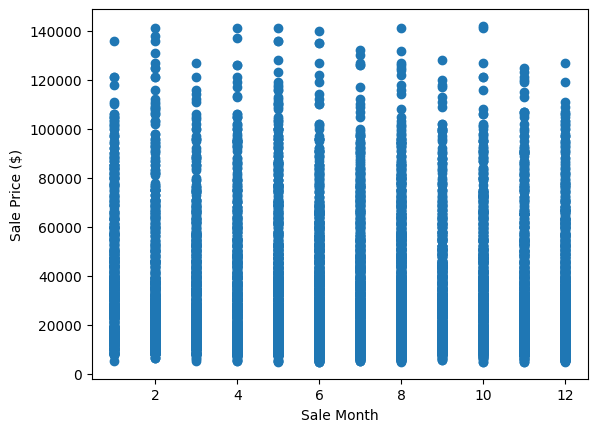

In [123]:
# View 10,000 samples SalePrice against saleMonth
fig, ax = plt.subplots()
ax.scatter(x=df_tmp["saleMonth"][:10000], # visualize the first 10000 values
           y=df_tmp["SalePrice"][:10000])
ax.set_xlabel("Sale Month")
ax.set_ylabel("Sale Price ($)");

## Visualizing Monthly Price Trends

This code makes a graph that shows typical bulldozer prices for each month. We look at the average price per month to:

- Identify seasonal pricing patterns
    - Spot months with typically higher or lower prices
    - Help buyers and sellers make more informed decisions

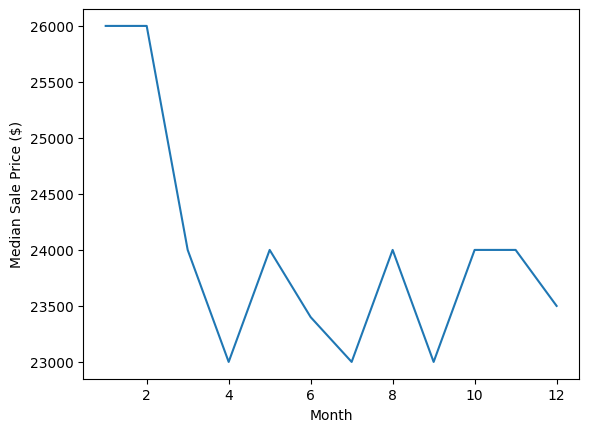

In [124]:
# Group DataFrame by saleMonth and then find the median SalePrice
df_tmp.groupby(["saleMonth"])["SalePrice"].median().plot()
plt.xlabel("Month")
plt.ylabel("Median Sale Price ($)");

## Analyzing State Distribution

This code looks at how many bulldozers were sold in different states. We count the sales for each state and show the top 50. This information tells us:

- Which states sell the most bulldozers
- Which regions have the biggest markets

In [125]:
# Check the different values of different columns
df_tmp.state.value_counts()[:50]

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virgi

## Visualizing Median Bulldozer Prices Across States

This code makes a chart that shows how bulldozer prices differ from state to state. It helps us see:

- What the chart shows:
    - The typical (median) price of bulldozers in each state
    - A red dotted line showing the typical price across all states
- What we can learn:
    - Which states have more expensive or cheaper bulldozers
    - How each state's prices compare to the country's average

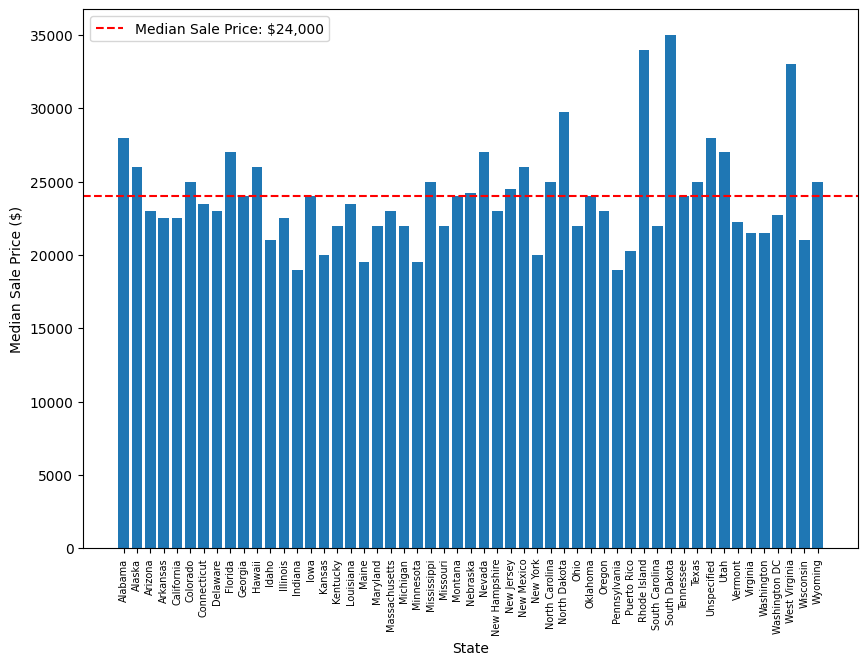

In [126]:
# Group DataFrame by saleMonth and then find the median SalePrice per state as well as across the whole dataset
median_prices_by_state = df_tmp.groupby(["state"])["SalePrice"].median() # this will return a pandas Series rather than a DataFrame
median_sale_price = df_tmp["SalePrice"].median()

# Create a plot comparing median sale price per state to median sale price overall
plt.figure(figsize=(10, 7))
plt.bar(x=median_prices_by_state.index, # Because we're working with a Series, we can use the index (state names) as the x values
        height=median_prices_by_state.values)
plt.xlabel("State")
plt.ylabel("Median Sale Price ($)")
plt.xticks(rotation=90, fontsize=7);
plt.axhline(y=median_sale_price, 
            color="red", 
            linestyle="--", 
            label=f"Median Sale Price: ${median_sale_price:,.0f}")
plt.legend();

# **Saving Processed Data to CSV**

This code saves our processed bulldozer data to a file. Here's what it does:

- Main Goal:
    - Saves our bulldozer data into a CSV file (a type of spreadsheet)
    - Makes sure our data is saved correctly without errors
- How it works:
    - Checks for any problems while saving the file
    - Tells us if the save was successful or if there was an error
    - Keeps the file clean by not adding extra row numbers

In [127]:
import pandas as pd

# Assuming df is your DataFrame with the processed data
# df = ...

try:
    df.to_csv('TrainAndValid_processed.csv', index=False)
    print("Changes successfully saved to TrainAndValid_processed.csv")
except Exception as e:
    print(f"An error occurred while saving the changes: {e}")

Changes successfully saved to TrainAndValid_processed.csv


# **Conclusion and Next Steps**
## Overview

In this notebook, we worked on making our dataset better by adding new useful information. This will help our machine learning model make better predictions about bulldozer prices. Here's what we did:

### Feature Creation

- **Feature Creation**: We successfully engineered several new features, including:
    - **Bulldozer Age**: We found out how old each bulldozer was by looking at when it was made and when it was sold.
    - **Usage Information**: We looked at how much each bulldozer was used based on its working hours and similar data
    - **Number and Text Conversions**: Changed information like model names and categories into numbers that our machine learning model can work with better

### Data Processing

- **Feature Selection**: We looked at how useful each piece of data was by checking how it relates to bulldozer prices and testing it in simple models.
- **Data Transformation**:  Changed the data into a format that our machine learning model can better understand. This included adjusting numbers to be on similar scales and converting text data into numbers.

### Results

These steps have laid a solid foundation for building a robust predictive model by ensuring that the dataset is rich with relevant and informative features.

## Next Steps
- `03_exploratory_data_analysis.ipynb:` This notebook will contain the exploratory data analysis (EDA), including visualizing data distributions, relationships between variables, and identifying patterns.



---